# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 32
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 10
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="figures/face/cont_{}/Beta_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=42, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequenti

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model2_params.pkl')
torch.save(model, './model2')
##15.078 -   17.209= 0.0147 - 0.0168 error tanh 
##lambda 5 0.025-0.029
##PLOT THE CURVE!!!!!

/data/anaconda/envs/mli/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/54000	Loss: 642.562	L0 Loss: 0.424
3200/54000	Loss: 474.644	L0 Loss: 0.423
6400/54000	Loss: 401.300	L0 Loss: 0.423
9600/54000	Loss: 389.646	L0 Loss: 0.423
12800/54000	Loss: 374.334	L0 Loss: 0.424
16000/54000	Loss: 368.358	L0 Loss: 0.424
19200/54000	Loss: 363.186	L0 Loss: 0.424
22400/54000	Loss: 358.067	L0 Loss: 0.424
25600/54000	Loss: 357.243	L0 Loss: 0.424
28800/54000	Loss: 352.883	L0 Loss: 0.424
32000/54000	Loss: 349.364	L0 Loss: 0.424
35200/54000	Loss: 346.660	L0 Loss: 0.425
38400/54000	Loss: 344.638	L0 Loss: 0.425
41600/54000	Loss: 341.638	L0 Loss: 0.425
44800/54000	Loss: 339.699	L0 Loss: 0.425
48000/54000	Loss: 335.894	L0 Loss: 0.425
51200/54000	Loss: 332.100	L0 Loss: 0.425
Valid Loss: 331.111, Recon Error: 0.032
331.1105181105593
Epoch: 1 Average loss: 363.19 Valid loss: 331.1105181105593	Recon Error:0.032
0/54000	Loss: 328.084	L0 Loss: 0.426
3200/54000	Loss: 331.644	L0 Loss: 0.426
6400/54000	Loss: 331.985	L0 Loss: 0.426
9600/54000	Loss: 331.986	L0 Loss: 0.426
12800/54000	Loss:

0/54000	Loss: 277.000	L0 Loss: 0.450
3200/54000	Loss: 278.801	L0 Loss: 0.450
6400/54000	Loss: 281.039	L0 Loss: 0.450
9600/54000	Loss: 280.441	L0 Loss: 0.450
12800/54000	Loss: 276.979	L0 Loss: 0.450
16000/54000	Loss: 277.485	L0 Loss: 0.451
19200/54000	Loss: 276.413	L0 Loss: 0.451
22400/54000	Loss: 274.265	L0 Loss: 0.451
25600/54000	Loss: 275.569	L0 Loss: 0.451
28800/54000	Loss: 273.687	L0 Loss: 0.451
32000/54000	Loss: 274.226	L0 Loss: 0.451
35200/54000	Loss: 270.828	L0 Loss: 0.451
38400/54000	Loss: 269.093	L0 Loss: 0.452
41600/54000	Loss: 272.945	L0 Loss: 0.452
44800/54000	Loss: 272.348	L0 Loss: 0.452
48000/54000	Loss: 272.620	L0 Loss: 0.452
51200/54000	Loss: 272.400	L0 Loss: 0.452
Valid Loss: 268.026, Recon Error: 0.040
268.02646166213015
Epoch: 11 Average loss: 274.88 Valid loss: 268.02646166213015	Recon Error:0.040
0/54000	Loss: 272.133	L0 Loss: 0.452
3200/54000	Loss: 272.230	L0 Loss: 0.452
6400/54000	Loss: 268.625	L0 Loss: 0.453
9600/54000	Loss: 268.288	L0 Loss: 0.453
12800/54000	Lo

0/54000	Loss: 240.595	L0 Loss: 0.461
3200/54000	Loss: 239.164	L0 Loss: 0.461
6400/54000	Loss: 235.789	L0 Loss: 0.461
9600/54000	Loss: 239.715	L0 Loss: 0.461
12800/54000	Loss: 236.301	L0 Loss: 0.461
16000/54000	Loss: 236.714	L0 Loss: 0.461
19200/54000	Loss: 239.127	L0 Loss: 0.461
22400/54000	Loss: 239.050	L0 Loss: 0.461
25600/54000	Loss: 239.845	L0 Loss: 0.461
28800/54000	Loss: 235.650	L0 Loss: 0.461
32000/54000	Loss: 236.972	L0 Loss: 0.461
35200/54000	Loss: 239.776	L0 Loss: 0.461
38400/54000	Loss: 235.386	L0 Loss: 0.461
41600/54000	Loss: 238.168	L0 Loss: 0.461
44800/54000	Loss: 238.673	L0 Loss: 0.461
48000/54000	Loss: 237.226	L0 Loss: 0.461
51200/54000	Loss: 239.596	L0 Loss: 0.461
Valid Loss: 240.117, Recon Error: 0.036
240.117292688248
Epoch: 21 Average loss: 238.12 Valid loss: 240.117292688248	Recon Error:0.036
0/54000	Loss: 224.381	L0 Loss: 0.461
3200/54000	Loss: 240.846	L0 Loss: 0.461
6400/54000	Loss: 239.173	L0 Loss: 0.461
9600/54000	Loss: 233.737	L0 Loss: 0.461
12800/54000	Loss: 

0/54000	Loss: 223.231	L0 Loss: 0.438
3200/54000	Loss: 227.587	L0 Loss: 0.437
6400/54000	Loss: 224.819	L0 Loss: 0.437
9600/54000	Loss: 224.352	L0 Loss: 0.437
12800/54000	Loss: 223.728	L0 Loss: 0.436
16000/54000	Loss: 223.798	L0 Loss: 0.436
19200/54000	Loss: 226.252	L0 Loss: 0.436
22400/54000	Loss: 227.866	L0 Loss: 0.435
25600/54000	Loss: 224.810	L0 Loss: 0.435
28800/54000	Loss: 228.140	L0 Loss: 0.435
32000/54000	Loss: 231.058	L0 Loss: 0.434
35200/54000	Loss: 223.574	L0 Loss: 0.434
38400/54000	Loss: 226.741	L0 Loss: 0.434
41600/54000	Loss: 225.023	L0 Loss: 0.433
44800/54000	Loss: 222.097	L0 Loss: 0.433
48000/54000	Loss: 227.389	L0 Loss: 0.433
51200/54000	Loss: 222.428	L0 Loss: 0.432
Valid Loss: 227.237, Recon Error: 0.032
227.2374158818671
Epoch: 31 Average loss: 225.66 Valid loss: 227.2374158818671	Recon Error:0.032
0/54000	Loss: 220.582	L0 Loss: 0.432
3200/54000	Loss: 226.839	L0 Loss: 0.432
6400/54000	Loss: 226.174	L0 Loss: 0.431
9600/54000	Loss: 223.038	L0 Loss: 0.431
12800/54000	Loss

0/54000	Loss: 242.279	L0 Loss: 0.376
3200/54000	Loss: 222.203	L0 Loss: 0.376
6400/54000	Loss: 224.870	L0 Loss: 0.376
9600/54000	Loss: 227.834	L0 Loss: 0.376
12800/54000	Loss: 222.036	L0 Loss: 0.375
16000/54000	Loss: 223.179	L0 Loss: 0.375
19200/54000	Loss: 220.824	L0 Loss: 0.375
22400/54000	Loss: 224.199	L0 Loss: 0.375
25600/54000	Loss: 221.096	L0 Loss: 0.375
28800/54000	Loss: 222.998	L0 Loss: 0.374
32000/54000	Loss: 223.085	L0 Loss: 0.374
35200/54000	Loss: 222.927	L0 Loss: 0.374
38400/54000	Loss: 218.208	L0 Loss: 0.374
41600/54000	Loss: 220.360	L0 Loss: 0.374
44800/54000	Loss: 223.986	L0 Loss: 0.373
48000/54000	Loss: 224.438	L0 Loss: 0.373
51200/54000	Loss: 221.297	L0 Loss: 0.373
Valid Loss: 230.206, Recon Error: 0.032
230.20552598669173
Epoch: 41 Average loss: 222.83 Valid loss: 230.20552598669173	Recon Error:0.032
0/54000	Loss: 239.361	L0 Loss: 0.373
3200/54000	Loss: 225.264	L0 Loss: 0.372
6400/54000	Loss: 223.375	L0 Loss: 0.372
9600/54000	Loss: 222.212	L0 Loss: 0.372
12800/54000	Lo

0/54000	Loss: 205.838	L0 Loss: 0.358
3200/54000	Loss: 219.758	L0 Loss: 0.358
6400/54000	Loss: 222.205	L0 Loss: 0.358
9600/54000	Loss: 219.209	L0 Loss: 0.358
12800/54000	Loss: 225.362	L0 Loss: 0.358
16000/54000	Loss: 217.752	L0 Loss: 0.358
19200/54000	Loss: 220.429	L0 Loss: 0.358
22400/54000	Loss: 219.302	L0 Loss: 0.358
25600/54000	Loss: 214.868	L0 Loss: 0.358
28800/54000	Loss: 220.327	L0 Loss: 0.358
32000/54000	Loss: 219.352	L0 Loss: 0.358
35200/54000	Loss: 218.273	L0 Loss: 0.358
38400/54000	Loss: 220.388	L0 Loss: 0.358
41600/54000	Loss: 223.872	L0 Loss: 0.358
44800/54000	Loss: 222.458	L0 Loss: 0.358
48000/54000	Loss: 218.070	L0 Loss: 0.358
51200/54000	Loss: 221.850	L0 Loss: 0.358
Valid Loss: 220.336, Recon Error: 0.034
220.33602483221824
Epoch: 51 Average loss: 220.40 Valid loss: 220.33602483221824	Recon Error:0.034
0/54000	Loss: 194.368	L0 Loss: 0.358
3200/54000	Loss: 220.969	L0 Loss: 0.358
6400/54000	Loss: 221.227	L0 Loss: 0.358
9600/54000	Loss: 221.957	L0 Loss: 0.358
12800/54000	Lo

0/54000	Loss: 208.394	L0 Loss: 0.349
3200/54000	Loss: 223.170	L0 Loss: 0.349
6400/54000	Loss: 220.191	L0 Loss: 0.349
9600/54000	Loss: 219.862	L0 Loss: 0.348
12800/54000	Loss: 219.142	L0 Loss: 0.348
16000/54000	Loss: 219.071	L0 Loss: 0.348
19200/54000	Loss: 214.583	L0 Loss: 0.348
22400/54000	Loss: 223.016	L0 Loss: 0.348
25600/54000	Loss: 224.799	L0 Loss: 0.348
28800/54000	Loss: 217.930	L0 Loss: 0.348
32000/54000	Loss: 215.372	L0 Loss: 0.348
35200/54000	Loss: 219.553	L0 Loss: 0.348
38400/54000	Loss: 218.291	L0 Loss: 0.348
41600/54000	Loss: 215.563	L0 Loss: 0.348
44800/54000	Loss: 218.840	L0 Loss: 0.348
48000/54000	Loss: 214.885	L0 Loss: 0.348
51200/54000	Loss: 221.919	L0 Loss: 0.348
Valid Loss: 219.922, Recon Error: 0.031
219.9216016404172
Epoch: 61 Average loss: 219.30 Valid loss: 219.9216016404172	Recon Error:0.031
0/54000	Loss: 213.409	L0 Loss: 0.348
3200/54000	Loss: 222.194	L0 Loss: 0.347
6400/54000	Loss: 217.093	L0 Loss: 0.347
9600/54000	Loss: 222.542	L0 Loss: 0.347
12800/54000	Loss

0/54000	Loss: 230.221	L0 Loss: 0.343
3200/54000	Loss: 217.419	L0 Loss: 0.343
6400/54000	Loss: 222.874	L0 Loss: 0.343
9600/54000	Loss: 217.757	L0 Loss: 0.343
12800/54000	Loss: 220.361	L0 Loss: 0.343
16000/54000	Loss: 218.997	L0 Loss: 0.342
19200/54000	Loss: 214.977	L0 Loss: 0.343
22400/54000	Loss: 219.529	L0 Loss: 0.343
25600/54000	Loss: 220.010	L0 Loss: 0.342
28800/54000	Loss: 220.581	L0 Loss: 0.342
32000/54000	Loss: 216.277	L0 Loss: 0.342
35200/54000	Loss: 220.253	L0 Loss: 0.342
38400/54000	Loss: 217.494	L0 Loss: 0.342
41600/54000	Loss: 211.600	L0 Loss: 0.342
44800/54000	Loss: 217.598	L0 Loss: 0.342
48000/54000	Loss: 219.460	L0 Loss: 0.342
51200/54000	Loss: 218.475	L0 Loss: 0.342
Valid Loss: 220.052, Recon Error: 0.028
220.05241556370513
Epoch: 71 Average loss: 218.53 Valid loss: 220.05241556370513	Recon Error:0.028
0/54000	Loss: 219.657	L0 Loss: 0.342
3200/54000	Loss: 219.184	L0 Loss: 0.342
6400/54000	Loss: 212.444	L0 Loss: 0.342
9600/54000	Loss: 217.413	L0 Loss: 0.342
12800/54000	Lo

0/54000	Loss: 197.563	L0 Loss: 0.342
3200/54000	Loss: 213.371	L0 Loss: 0.342
6400/54000	Loss: 217.773	L0 Loss: 0.342
9600/54000	Loss: 217.890	L0 Loss: 0.342
12800/54000	Loss: 213.038	L0 Loss: 0.342
16000/54000	Loss: 216.214	L0 Loss: 0.342
19200/54000	Loss: 219.607	L0 Loss: 0.342
22400/54000	Loss: 219.770	L0 Loss: 0.342
25600/54000	Loss: 217.076	L0 Loss: 0.342
28800/54000	Loss: 218.518	L0 Loss: 0.342
32000/54000	Loss: 218.082	L0 Loss: 0.342
35200/54000	Loss: 217.872	L0 Loss: 0.342
38400/54000	Loss: 220.107	L0 Loss: 0.342
41600/54000	Loss: 219.669	L0 Loss: 0.342
44800/54000	Loss: 216.583	L0 Loss: 0.342
48000/54000	Loss: 218.755	L0 Loss: 0.342
51200/54000	Loss: 214.778	L0 Loss: 0.342
Valid Loss: 218.762, Recon Error: 0.029
218.76221774486785
Epoch: 81 Average loss: 217.35 Valid loss: 218.76221774486785	Recon Error:0.029
0/54000	Loss: 263.503	L0 Loss: 0.342
3200/54000	Loss: 218.581	L0 Loss: 0.342
6400/54000	Loss: 219.341	L0 Loss: 0.342
9600/54000	Loss: 215.035	L0 Loss: 0.342
12800/54000	Lo

0/54000	Loss: 188.837	L0 Loss: 0.342
3200/54000	Loss: 217.371	L0 Loss: 0.342
6400/54000	Loss: 218.471	L0 Loss: 0.342
9600/54000	Loss: 216.946	L0 Loss: 0.342
12800/54000	Loss: 215.944	L0 Loss: 0.342
16000/54000	Loss: 214.389	L0 Loss: 0.342
19200/54000	Loss: 218.320	L0 Loss: 0.342
22400/54000	Loss: 222.373	L0 Loss: 0.342
25600/54000	Loss: 217.241	L0 Loss: 0.342
28800/54000	Loss: 218.790	L0 Loss: 0.342
32000/54000	Loss: 217.840	L0 Loss: 0.342
35200/54000	Loss: 223.092	L0 Loss: 0.342
38400/54000	Loss: 219.714	L0 Loss: 0.342
41600/54000	Loss: 217.797	L0 Loss: 0.342
44800/54000	Loss: 216.805	L0 Loss: 0.342
48000/54000	Loss: 218.964	L0 Loss: 0.342
51200/54000	Loss: 218.068	L0 Loss: 0.342
Valid Loss: 218.459, Recon Error: 0.029
218.45943045108876
Epoch: 91 Average loss: 218.32 Valid loss: 218.45943045108876	Recon Error:0.029
0/54000	Loss: 215.095	L0 Loss: 0.342
3200/54000	Loss: 215.588	L0 Loss: 0.342
6400/54000	Loss: 219.455	L0 Loss: 0.342
9600/54000	Loss: 214.336	L0 Loss: 0.342
12800/54000	Lo

In [3]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('model2_params.pkl'))
path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
18760


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.]],
       device='cuda:0', grad_fn=<ViewBackward>)
(8, 8)
1.0


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


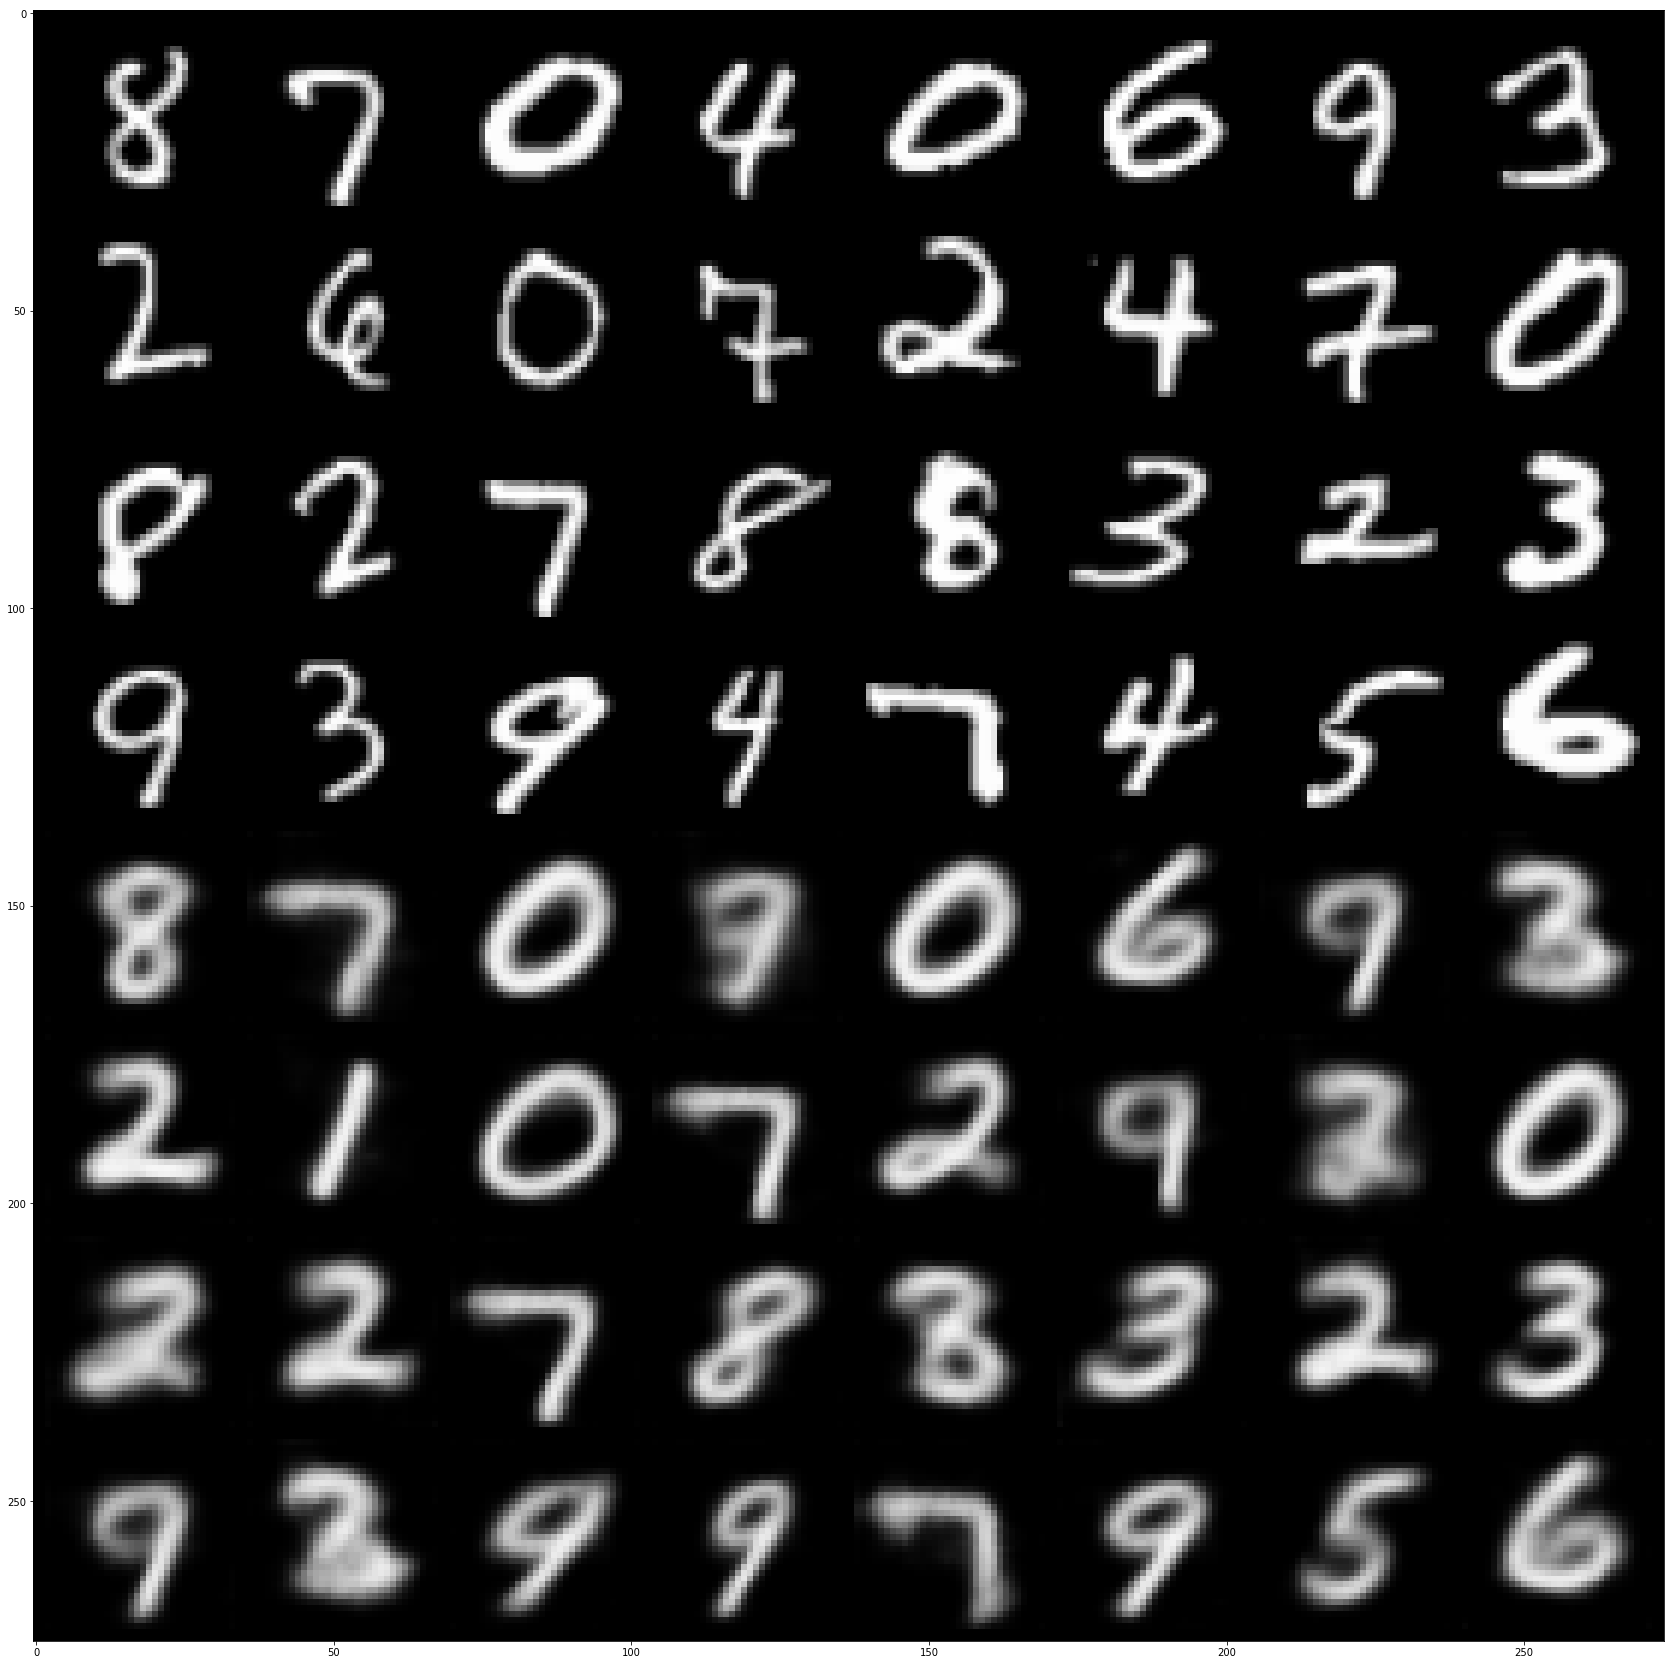

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [5]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask)

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
    

tensor([[1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.]],
       device='cuda:0', grad_fn=<ViewBackward>)


/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/data/anaconda/envs/mli/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/data/anaconda/envs/mli/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([64, 42]) 0
torch.Size([64, 42]) 1
torch.Size([64, 42]) 2
torch.Size([64, 42]) 3
torch.Size([64, 42]) 4
torch.Size([64, 42]) 5
torch.Size([64, 42]) 6
torch.Size([64, 42]) 7
torch.Size([64, 42]) 8
torch.Size([64, 42]) 9


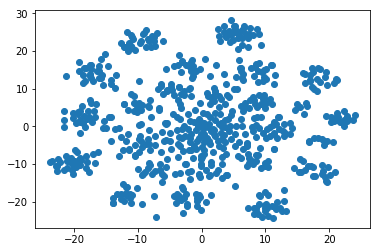

In [6]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    print(new_samples.shape,i)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

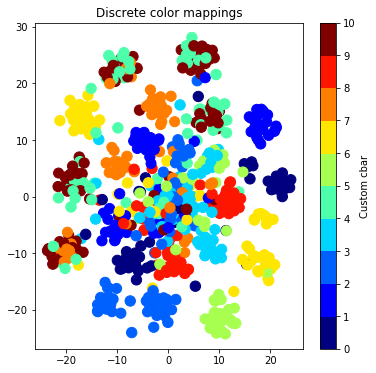

In [7]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


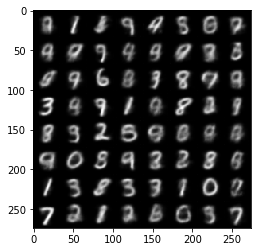

In [8]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

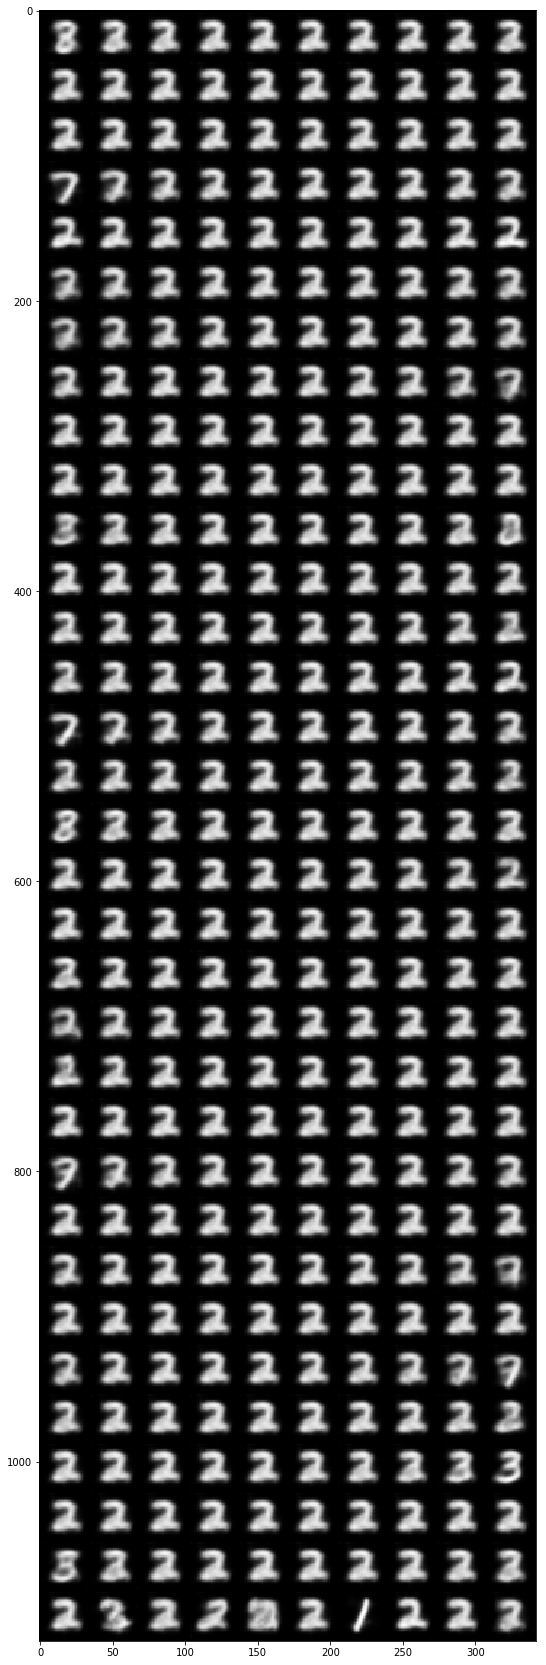

In [9]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

0.9317702

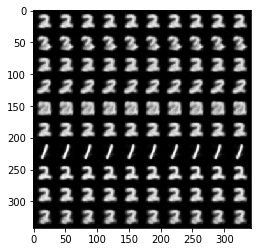

In [10]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


array([[ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
        22, 24, 26, 28, 29, 30, 32]])

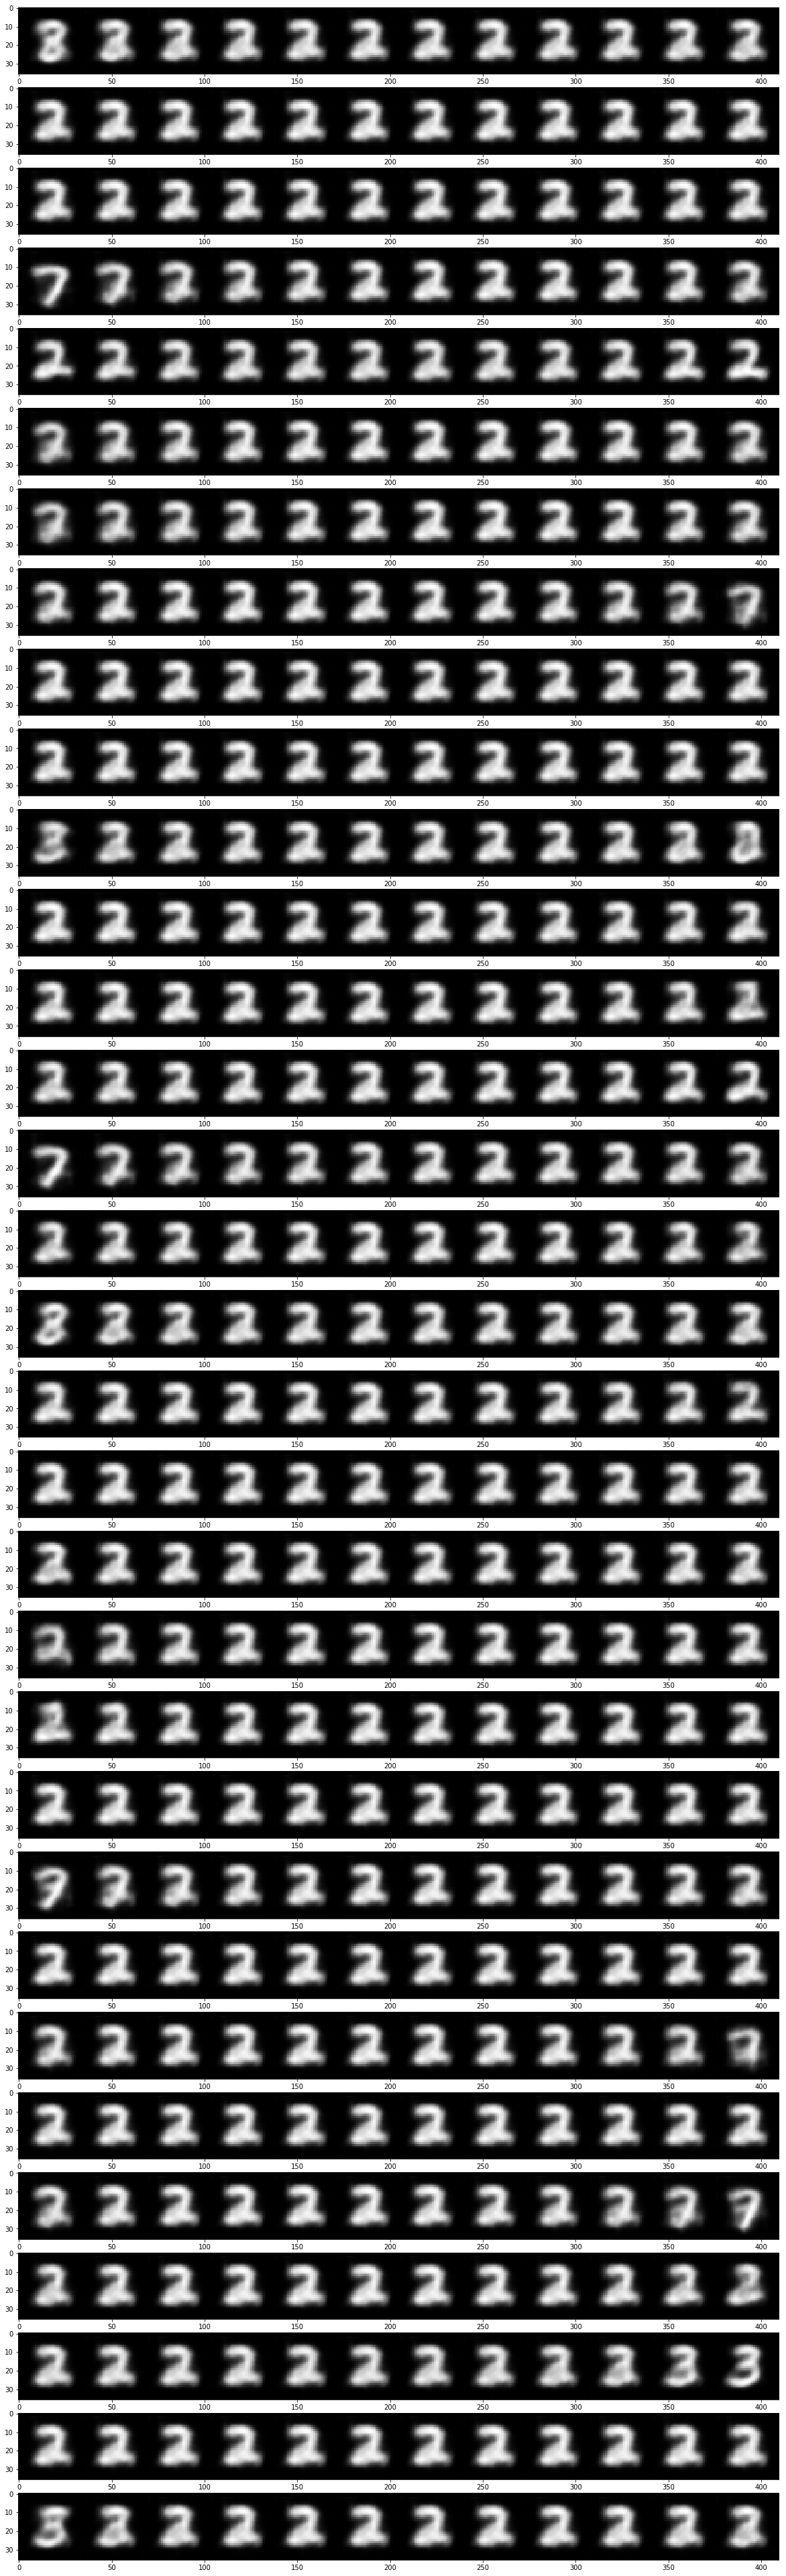

In [11]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
show_idx(mask)
    

discrete


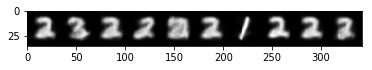

In [12]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [13]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [14]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)

interactive(children=(IntSlider(value=16, description='cont_idx', max=32), FloatSlider(value=0.0, description=…

array([[ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
        22, 24, 26, 28, 29, 30, 32]])